In [1]:
# Imports
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F


from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Subset, TensorDataset

from torchsummary import summary
import torchvision as tv
import torchvision.transforms as T
import copy

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline as backend_inline

backend_inline.set_matplotlib_formats("svg")


#### Pytorch device specific configuration ###

# Pytorch Gpu Configuration for Cuda
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Pytorch Gpu Configuration for directml(AMD GPU)
# import torch_directml

# device = torch_directml.device()

# Set default device
torch.set_default_device(device)


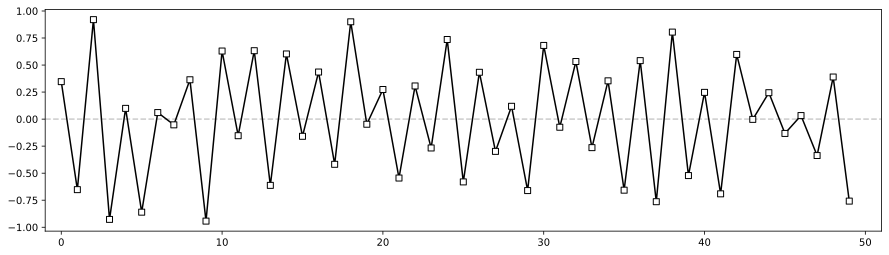

torch.Size([50])

In [7]:
## Create temporal sequence data
# Import the data
N = 50

data = torch.zeros(N)

for i in range(N):
    data[i] = torch.rand(1) * (-1) ** i

plt.figure(figsize=(15, 4))
plt.plot([-1, N + 1], [0, 0], "--", color=[0.8, 0.8, 0.8])
plt.plot(data.cpu(), "ks-", markerfacecolor="w")
plt.xlim([-1, N + 1])
plt.show()
data.shape


In [8]:
## Create a class for the RNN DL model
class rnnnet(nn.Module):
    def __init__(self, input_size, num_hidden, num_layers):
        super().__init__()
        print(f'Input Size: {input_size}, Hidden Layers: {num_hidden}, Number of Layers: {num_layers}')
        # RNN Layers
        self.rnn = nn.RNN(input_size, num_hidden, num_layers)

        # Linear layer for output
        self.out = nn.Linear(num_hidden, 1)

    def forward(self, x):
        # Run through the RNN Layer
        y, hidden = self.rnn(x) # There will be no explicit hidden state initialization

        # And the output (linear) layer
        y = self.out(y)

        return y, hidden


In [10]:
# Network parameters
input_size = 1 # Channels of data
num_hidden = 5 # Breadth of model (Number of units in hidden layers)
num_layers = 1 # Depth of model (number of stacks of hidden layers)
seqlength = 9 # Number of datapoints used for learning in each segments
batchsize = 1 # Note: The training code is actually hard coded to organize data into batchsize=1

# Create an instance of the model
net = rnnnet(input_size, num_hidden, num_layers)
X = torch.rand(seqlength, batchsize, input_size)
y, h = net(X)
print('X shape: ', X.shape)
print(
    'y Shape: ', y.shape
)  # note: one output per sequence element; generally, we take the final output to force a "many-to-one" design.
print('h shape: ', h.shape)


Input Size: 1, Hidden Layers: 5, Number of Layers: 1
X shape:  torch.Size([9, 1, 1])
y Shape:  torch.Size([9, 1, 1])
h shape:  torch.Size([1, 1, 5])


In [14]:
# test the model with some data
somedata = data[:seqlength].view(seqlength, 1, 1)
print(somedata.shape)
y = net(somedata)

# grab the final predicted value from the output (first element of tuple output of net)
finalValue = y[0][-1]
print(f'Final value: {finalValue}')

lossfun = nn.MSELoss()
loss = lossfun(finalValue, data[seqlength].view(1, 1))
print(f'Loss: {loss}')


torch.Size([9, 1, 1])
Final value: tensor([[0.1424]], device='cuda:0', grad_fn=<SelectBackward0>)
Loss: 1.1779580116271973


In [ ]:
# Train the model and show performance
epochs = 30

# 
